In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import time
from utilities import *
from sklearn.metrics import mean_squared_error
import os
from datetime import datetime

In [7]:
# get current directory
path = os.getcwd()
print("Current Directory", path)
 
# prints parent directory
print(os.path.abspath(os.path.join(path, os.pardir)))
parent_dir = os.path.abspath(os.path.join(path, os.pardir))

Current Directory c:\Users\I539001\OneDrive - SAP SE\Desktop\AutoRUL_final\AL\AutoRUL
c:\Users\I539001\OneDrive - SAP SE\Desktop\AutoRUL_final\AL


In [8]:
battery_data = pd.read_csv(f'{parent_dir}\\FeedbackBoost\\Data\\Battery_RUL\\Battery_RUL.csv')

In [9]:
battery_data

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


# Data preparation

In [42]:
battery_data.rename(columns = {"Cycle_Index" : "cycle"}, inplace = True)

In [43]:
battery_data["RUL"].value_counts()

0       14
1058    14
43      14
35      14
27      14
        ..
738      1
1121     1
737      1
1128     1
1131     1
Name: RUL, Length: 1133, dtype: int64

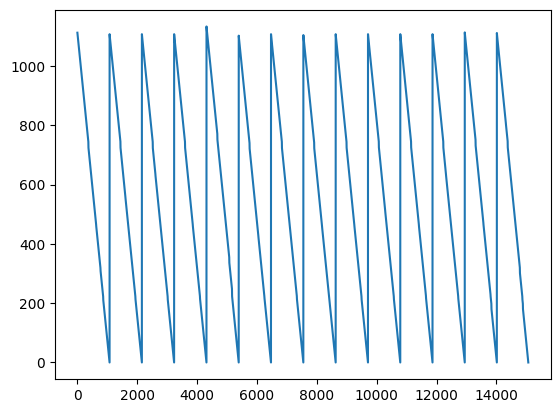

In [44]:
plt.plot(battery_data["RUL"])

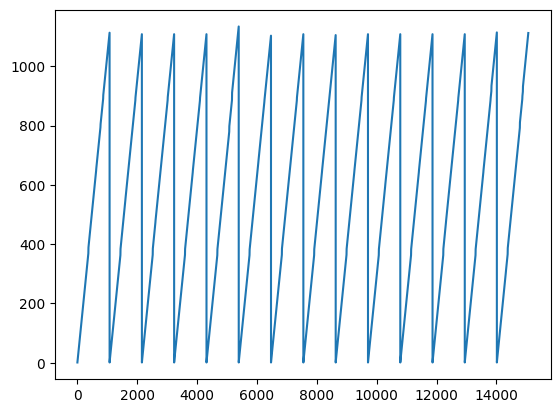

In [45]:
plt.plot(battery_data["cycle"])

In [46]:
battery_data.loc[battery_data["cycle"] == 1.0]

,cycle,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.4885,3.670,3.211,5460.001,6755.01,10777.82,1112
1076,1.0,2604.00,1186.4955,3.666,3.213,5424.991,6706.02,10772.99,1107
2155,1.0,2562.02,1140.9910,3.666,3.219,5452.993,6740.99,10836.00,1107
3232,1.0,2566.08,1161.9830,3.667,3.214,5452.992,6740.99,10938.33,1107
4313,1.0,2590.02,1239.0070,3.660,3.225,5376.000,6678.01,10821.98,1133
5390,1.0,2609.47,1372.0000,3.650,3.228,5348.000,6678.02,11078.56,1102
6468,1.0,2590.98,1154.9760,3.667,3.224,5452.992,6727.01,10819.42,1107
7549,1.0,2590.50,1169.0240,3.667,3.206,5446.016,6734.02,10759.26,1104
8629,1.0,2565.31,1186.4965,3.664,3.221,5439.007,6740.99,10999.07,1107
9708,1.0,2587.94,1231.9990,3.661,3.223,5383.009,6678.02,10856.83,1107


In [47]:
# assigning rtf_ids to the data accordingly
rtf_1 = battery_data.loc[:1075]
rtf_1["rtf_id"] = 1

rtf_2 = battery_data.loc[1076:2154]
rtf_2["rtf_id"] = 2

rtf_3 = battery_data.loc[2155:3231]
rtf_3["rtf_id"] = 3
rtf_4 = battery_data.loc[3232:4312]
rtf_4["rtf_id"] = 4
rtf_5 = battery_data.loc[4313:5390 -1]
rtf_5["rtf_id"] = 5
rtf_6 = battery_data.loc[5390 :6467]
rtf_6["rtf_id"] = 6
rtf_7 = battery_data.loc[6468:7548]
rtf_7["rtf_id"] = 7
rtf_8 = battery_data.loc[7549:8628]
rtf_8["rtf_id"] = 8

rtf_9 = battery_data.loc[8629:9707]
rtf_9["rtf_id"] = 9

rtf_10 = battery_data.loc[9708:10786]
rtf_10["rtf_id"] = 10

rtf_11 = battery_data.loc[10787:11863]
rtf_11["rtf_id"] = 11

rtf_12 = battery_data.loc[11864:12940]
rtf_12["rtf_id"] = 12

rtf_13 = battery_data.loc[12941:14012]
rtf_13["rtf_id"] = 13

rtf_14 = battery_data.loc[14013:]
rtf_14["rtf_id"] = 14

df = pd.concat([rtf_1, rtf_2, rtf_3, rtf_4, rtf_5, rtf_6, rtf_7, rtf_8, rtf_9, rtf_10, rtf_11, rtf_12, rtf_13, rtf_14], ignore_index= True)

In [48]:
df

,cycle,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL,rtf_id
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112,1
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111,1
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110,1
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109,1
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107,1
...,...,...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4,14
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3,14
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2,14
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1,14


In [49]:
# putting the rtf_id column in the first position
first_column = df.pop('rtf_id')
df.insert(0, 'rtf_id', first_column)

In [50]:
df.head(2)

,rtf_id,cycle,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1,1.0,2595.30,1151.4885,3.670,3.211,5460.001,6755.01,10777.82,1112
1,1,2.0,7408.64,1172.5125,4.246,3.220,5508.992,6762.02,10500.35,1111


In [51]:
rtf_ids = df["rtf_id"].unique()
rtf_ids

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [52]:
train_df = df.loc[df['rtf_id'].isin(list(rtf_ids[:9]))]
test_df = df.loc[df['rtf_id'].isin(list(rtf_ids[9:]))]


In [53]:
rul_per_rtf_id_train = extract_RUL_per_rtf_id(train_df, rul_column_name= "RUL")
rul_per_rtf_id_train = rul_per_rtf_id_train["rul_per_rtf_id"]
rul_per_rtf_id_test = extract_RUL_per_rtf_id(test_df, rul_column_name= "RUL")
rul_per_rtf_id_test = rul_per_rtf_id_test["rul_per_rtf_id"]

In [54]:
train_df = train_df.drop(["RUL"], axis = 1)
test_df = test_df.drop(["RUL"], axis = 1)

 # RUL Prediction

In [55]:
import importlib
import rul
importlib.reload(rul)

<module 'rul' from 'c:\\Users\\I539001\\OneDrive - SAP SE\\PA2\\AL\\AutoRUL\\rul.py'>

In [56]:
test = rul.RemainingUsefulLife(train_df, test_df, test_rul_per_rtf_id= rul_per_rtf_id_test, train_rul_per_rtf_id= rul_per_rtf_id_train, epochs= 30, max_life= 150, data_id= "battey", path_to_trained_model=r"C:\Users\I539001\OneDrive - SAP SE\PA2\AL\AutoRUL\logs\battey_2022_10_13_12_14_40\ep017-loss224.594-val_loss65.965.h5")

In [58]:
test_pred, train_pred = test.auto_rul()

valid Configuration!
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_14 (ModuleWr  (None, 5, 12, 1, 10)     4820      
 apper)                                                          
                                                                 
 batch_normalization_14 (Bat  (None, 5, 12, 1, 10)     40        
 chNormalization)                                                
                                                                 
 module_wrapper_15 (ModuleWr  (None, 8, 1, 20)         18160     
 apper)                                                          
                                                                 
 batch_normalization_15 (Bat  (None, 8, 1, 20)         80        
 chNormalization)                                                
                                                                 
 flatten_7 (Flatten)         (Non

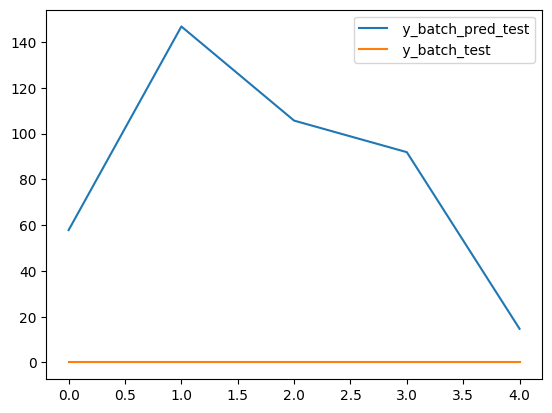

,y_batch_test,y_batch_pred_test
0,0.0,57.834229
1,0.0,146.776840
2,0.0,105.657974
3,0.0,91.874687
4,0.0,14.714751


In [59]:
plt.plot(test_pred["y_batch_pred_test"], label = " y_batch_pred_test")
plt.plot(test_pred["y_batch_test"], label = " y_batch_test")
plt.legend()
plt.show() 
test_pred

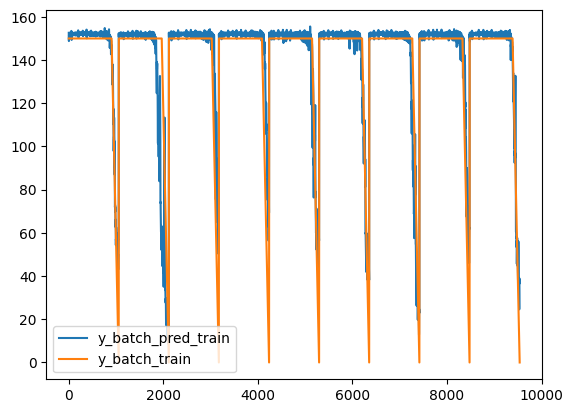

In [60]:
plt.plot(train_pred["y_batch_pred_train"], label = "y_batch_pred_train")
plt.plot(train_pred["y_batch_train"], label = "y_batch_train")
plt.legend()
plt.show()